### EDA with Python and applying Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


1.0 -> True (Null Value)
0.0 -> False (Not Null)

<AxesSubplot:>

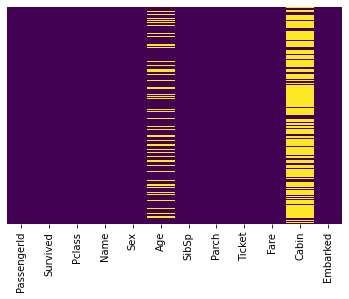

In [10]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.
Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or
change it to another feature like "Cabin Known: 1 or 0"


<AxesSubplot:xlabel='Survived', ylabel='count'>

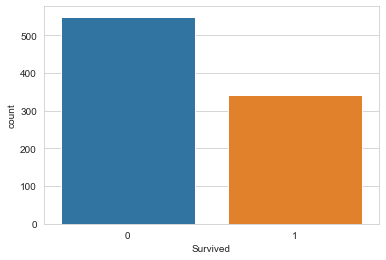

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

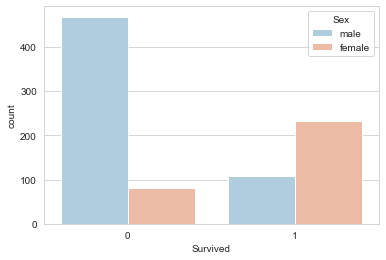

In [15]:
sns.countplot(x = 'Survived', hue='Sex', data=train, palette='RdBu_r')

C:\Users\hisan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

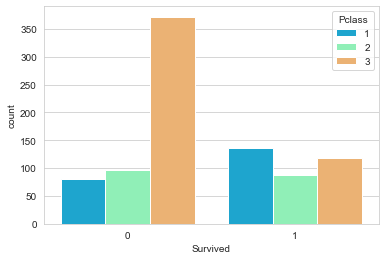

In [16]:
sns.set_style('whitegrid')
sns.countplot('Survived', hue='Pclass', data=train, palette='rainbow')

<AxesSubplot:xlabel='Age'>

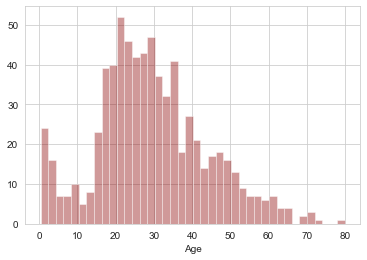

In [31]:
sns.distplot(train['Age'],kde=False,
             color='darkred',bins=40)

Text(0.5, 0, 'Age')

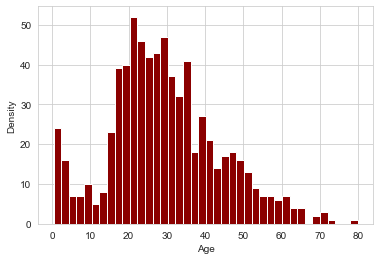

In [39]:
train['Age'].hist(color='darkred',bins=40)
plt.ylabel('Density')
plt.xlabel('Age')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

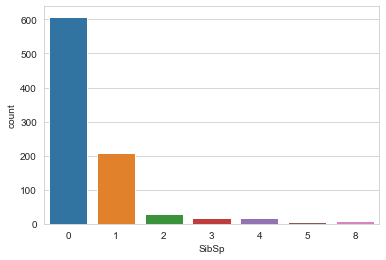

In [40]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

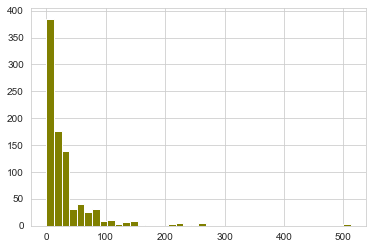

In [45]:
train['Fare'].hist(color='olive', bins=40)

# Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers
(imputation). However we can be smarter about this and check the average age by passenger class. For example:



<AxesSubplot:xlabel='Pclass', ylabel='Age'>

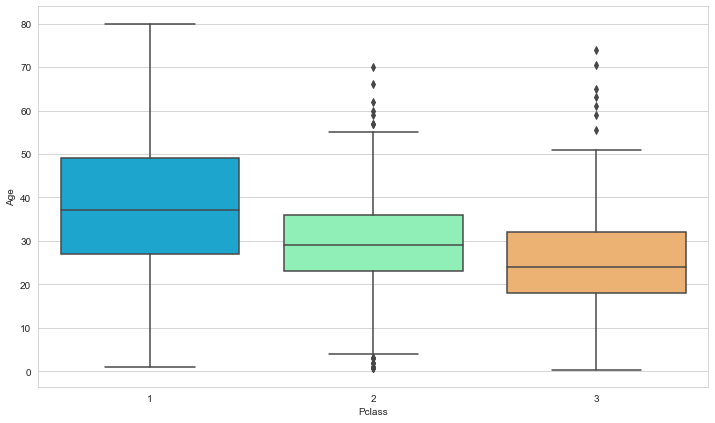

In [55]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='rainbow')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on
Pclass for Age.


In [57]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age
           

Now apply that function!

In [58]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

 Now let's check heatmap again!

<AxesSubplot:>

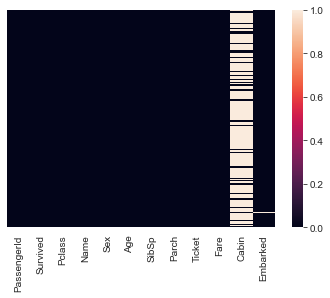

In [61]:
sns.heatmap(train.isnull(), yticklabels = False)

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [64]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

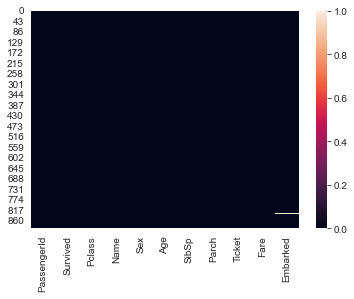

In [67]:


sns.heatmap(train.isnull())

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those
features as inputs.

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [71]:
pd.get_dummies(train['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [76]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [84]:
train.loc[[1]]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [77]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [79]:
train.drop(['Name','Sex','Ticket','Embarked'],axis = 1, inplace=True)

In [80]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [82]:
train = pd.concat([train,sex,embark],axis=1)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
